# CP213: Tutorial Notebook Week 2
# Model Solutions

## Question 1

Use the trapeziod rule with (a) four equal intervals and (b)
eight equal intervals to estimate the value of the integral:
\begin{align*}
\int_0^1 dx\, x^3.
\end{align*}
Find the exact value of the integral, and determine the percentage
error between the exact value and the value estimated in (a) and (b).


## Model solution for Q1


We can easily perform this integral:
\begin{align*}
I &= \int_0^{1}  dx\,x^3
= \left.\frac{x^4}{4}\right]_0^1 = \frac{1}{4} = 0.25
\end{align*}


### part (a)

The area $\Delta A$ of a trapezoid with a base of length $\Delta x$, one side of height $h_1$ and the other side of height $h_2$ is
\begin{align*}
\Delta A &= \frac{\Delta x}{2}(h_1+h+2)
.
\end{align*}
If we 
then the approximation to the integral is just the sum of the set of areas of the corresponding trapezoids.
\begin{align*}
I \approx \sum_k \frac{x_{i+1}-x_i}{2}[f(x_{i+1}+f(x_i)]
\end{align*}


trapezoid rule : 0.265625, exact: 0.25
error = 6.25%


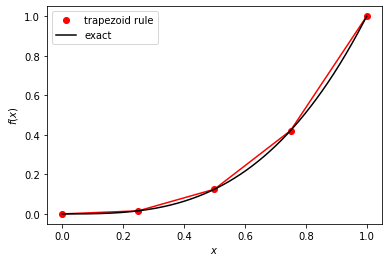

In [2]:
import numpy as np

I_exact = 0.25
def f(x):
    return x**3

N = 4+1
x_data = np.linspace(0.0, 1.0, N)
f_data = [f(x) for x in x_data]

I = 0.0
for k in range(N-1):
    I += 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
print(f'trapezoid rule : {I}, exact: {I_exact}')
print(f'error = {(I-I_exact)/I_exact*100.0}%')

import pylab as plt

plt.plot(x_data, f_data, color='red')
plt.plot(x_data, f_data, 'o', color='red', label='trapezoid rule')

x_exact = np.linspace(0.0, 1.0, 1000)
f_exact = [f(x) for x in x_exact]
plt.plot(x_exact, f_exact, color='black', label='exact')

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()

plt.show()


### part (b)

We can reuse the code we wrote above by simply changing the value of the variable $N$.

trapezoid rule : 0.25390625, exact: 0.25
error = 1.5625%


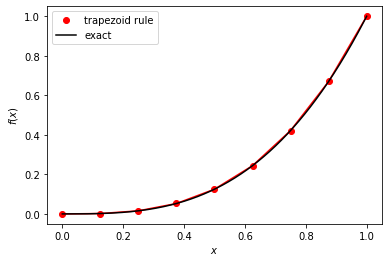

In [2]:
N = 8+1
x_data = np.linspace(0.0, 1.0, N)
f_data = [f(x) for x in x_data]

I = 0.0
for k in range(N-1):
    I += 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
print(f'trapezoid rule : {I}, exact: {I_exact}')
print(f'error = {(I-I_exact)/I_exact*100.0}%')

plt.plot(x_data, f_data, color='red')
plt.plot(x_data, f_data, 'o', color='red', label='trapezoid rule')

x_exact = np.linspace(0.0, 1.0, 1000)
f_exact = [f(x) for x in x_exact]
plt.plot(x_exact, f_exact, color='black', label='exact')

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()

plt.show()

### extra credit

Let's try to see how the error decreases as we increase the number of points used in evaluating the trapezoid rule.

In [ ]:
def get_I(N):
    x_data = np.linspace(0.0, 1.0, N)
    f_data = [f(x) for x in x_data]

    I = 0.0
    for k in range(N-1):
        I += 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
        
    return I


N_data = range(2,100)
I_data = [get_I(N) for N in N_data]


plt.rcParams['figure.figsize'] = [10.0, 5.0]

plt.subplot(121)
plt.plot(N_data, I_data, 'o', color='red', label='trapezoid rule')
plt.xlabel('$N$')
plt.ylabel('$I$')
plt.plot(N_data, [I_exact for N in N_data], color='black', label='exact')
plt.legend()

plt.subplot(122)
error_data = [(I-I_exact)/I_exact*100.0 for I in I_data]
plt.plot(N_data, error_data, 'o', color='red')
plt.yscale('log')
plt.ylabel('error %')
plt.xlabel('N')

plt.tight_layout(pad=2)
plt.show()

### extra extra credit

We can generalize this to any function with the use of the sympy library.  All you need to do is change the 

0.459697694131860


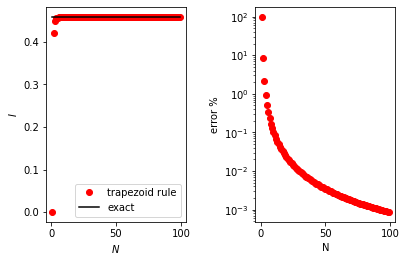

In [3]:
import sympy as sp

x = sp.symbols('x')
func = sp.sin(x)

F = sp.integrate(func, (x, 0, 1))
I_exact = sp.N(F)
print(I_exact)

f = sp.lambdify(x, func)

def get_I(N):
    x_data = np.linspace(0.0, 1.0, N)
    f_data = [f(x) for x in x_data]

    I = 0.0
    for k in range(N-1):
        I += 0.5*(x_data[k+1]-x_data[k])*(f_data[k]+f_data[k+1])
        
    return I


N_data = range(1,100)
I_data = [get_I(N) for N in N_data]

plt.subplot(121)
plt.plot(N_data, I_data, 'o', color='red', label='trapezoid rule')
plt.xlabel('$N$')
plt.ylabel('$I$')
plt.plot(N_data, [I_exact for N in N_data], color='black', label='exact')
plt.legend()

plt.subplot(122)
error_data = [abs(I-I_exact)/I_exact*100.0 for I in I_data]
plt.plot(N_data, error_data, 'o', color='red')
plt.yscale('log')
plt.ylabel('error %')
plt.xlabel('N')

plt.tight_layout(pad=2)
plt.show()

## Question 2

Fluid flows through a pipe with a circular cross-section of radius
$R$.

1. Find an expression for the volumetric flow rate $Q$ through the
  pipe if the fluid velocity within it is $v=\mbox{const}$.
  
2. What is the volumetric flow rate $\Delta Q$ through a circular
  annulus of inner radius $r$ and outer radius $r+\Delta r$ if the
  velocity of the fluid within the annulus is $v=\mbox{const}$?  What happens to this expression as $\Delta r$ becomes very small?
  
3. Find an expression for $Q$ for the case of laminar flow within
  the pipe, where the velocity profile is given by
\begin{align*}
v(r) &= \frac{\Delta p}{4\mu L}(R^2-r^2)
\end{align*}
where $v(r)$ is the velocity of the fluid at a distance $r$ from the
center of the pipe, $\Delta p$ is the pressure drop along the pipe,
$L$ is the length of the pipe, and $\mu$ is the dynamic viscosity of
the fluid.  What is the mean velocity of the fluid in the pipe?

4. Plot the velocity profile in the pipe for parts (1) and (3).


### part 1

In the case where the velocity in the pipe is constant, the
volumetric flow rate is simply given as the product of the
cross-sectional area of the pipe with the velocity.  Consequently,
$Q=\pi R^2 v$.


### part 2

The area $\Delta A$ of the annulus is
\begin{align*}
\Delta A &= \pi (r+\Delta r)^2 - \pi r^2 
=  \pi [(r+\Delta r)^2 - r^2]
= \pi (r^2 + 2 r \Delta r +\Delta r^2 - r^2)
\\
&= \pi (2\pi r \Delta r + \Delta r ^2)
\end{align*}
The volumetric flowrate $\Delta Q$ is equal to the cross sectional area multiplied by the velocity
\begin{align*}
\Delta Q &= \Delta A v
= \pi(2 r \Delta r +\Delta r^2) v
= 2\pi r \Delta r v + \pi\Delta r^2 v
.
\end{align*}

In the limit that $\Delta r/r\ll 1$, the second term in the expression for the volumetric flow rate becomes much smaller than the first term, and to a good approximation
\begin{align*}
\Delta Q &\approx
2\pi r \Delta r v 
.
\end{align*}


### part 3


Evaluate $Q$ for the case of laminar flow within the pipe, where the
  velocity profile is given by
\begin{align*}
  Q
  &= \int_0^{R} 2\pi rdr\, v(r)
  \\
  &= \int_0^{R} 2\pi rdr\, \frac{\Delta p}{4\mu L}(R^2-r^2)
  \\
  &= \frac{\pi \Delta p}{2\mu L} \int_0^{R} dr\, (R^2r-r^3)
  \\
  &= \frac{\pi \Delta p}{2\mu L}
    \left[ \frac{R^2r^2}{2}-\frac{r^4}{4})\right]_0^{R}
  \\
  &= \frac{\pi \Delta p}{2\mu L}
    \left[ \frac{R^4}{2}-\frac{R^4}{4})\right]
  \\
  &= \frac{\pi\Delta p R^4}{8\mu L}
\end{align*}

The mean velocity in the pipe is defined as the velocity
\begin{align*}
  Q &= \pi R^2 \bar{v} = \frac{\pi\Delta p R^4}{8\mu L}
  \\
  \bar{v} &= \frac{\Delta p R^2}{8\mu L}
\end{align*}


### part 4

The velocity profiles in cases (a) and (b) are shown below.



In [ ]:
import numpy as np
import pylab as plt

r_data = np.arange(0.0, 1.0, 0.01)
v_data = [1.0 for r in r_data]
plt.plot(r_data, v_data, label='part 1')

r_data = np.arange(0.0, 1.0, 0.01)
v_data = [2.0*(1.0-r*r) for r in r_data]
plt.plot(r_data, v_data, label='part 3')



plt.xlabel(r'$r/R$')
plt.ylabel(r'$v(r)/\bar{v}$')
plt.legend()



plt.show()


## Question 3

A brine solution (i.e. a mixture of salt and water) with a salt
concentration of $0.1\,{\rm kg\,L}^{-1}$ begins to flow at a constant
rate of $6\,{\rm L\,min}^{-1}$ into a large tank that initially holds
$1000\,{\rm L}$ of pure water.  The solution inside the tank is kept
well stirred and flows out of the tank at a rate of $6\,{\rm
L\,min}^{-1}$.  Determine the time at which the concentration of salt
in the tank reaches $0.05\,{\rm kg\,L}^{-1}$.


Hint: ${\rm rate~of~change} = {\rm input~rate} - {\rm output~rate}$.


## Model solution for Q3

The volumetric flow rate $\dot{Q}=6\,{\rm L\,min}^{-1}$ of brine solution
entering the tank is the same as the volumetric flowrate of liquid
exiting the tank.  Therefore, we expect the volume $V$ of liquid in the
tank to remain constant at $1000\,{\rm L}$.

Because the contents of the tank is well mixed, we assume that the
concentration of salt in the exit stream is equal to the concentration
of salt in the tank, at any given moment in time.

Performing a mass balance on salt in the tank, we find
\begin{align*}
  \frac{dm}{dt}
  &= \dot{Q} c_{\rm in} - \dot{Q} c
  \\
  &= \dot{Q} c_{\rm in} - \dot{Q} \frac{m}{V}
\end{align*}
We can put this into a more convenient form if we try to form
dimensionless groupings of variables, as shown below:
\begin{align*}
  \frac{1}{c_{\rm in}\dot{Q}}\frac{dm}{dt}
  &=  1 - \frac{m}{c_{\rm in} V}
    .
\end{align*}
This suggests that we define the dimensionless mass $y$ and time $x$
variables as:
\begin{align*}
  y &= \frac{m}{c_{\rm in} V}
  \\
  x &= \frac{t \dot{Q}}{V}
      ,
\end{align*}
which then allows us to simplify the equation to:
\begin{align*}
  \frac{dy}{dx}
  &= 1 - y
    .
\end{align*}
The general solution to this differential equation is
\begin{align*}
  \frac{dy}{1-y} &= dx
  \\
  \ln(1-y(x))
  &= - x + C
  \\
  y(x) &= 1 - e^{C - x}
\end{align*}
where $C$ is an unknown integration constant.  The value of the integration constant can be determined from the initial condition:
\begin{align*}
y(0) &= 1-e^C
\\
C &= \ln(1-y(0)).
\end{align*}
The tank does not contain any salt at time zero, so $y(0)=0$; therefore, we have $C=0$.  The solution to the differential equation is
\begin{align*}
y(x) &= 1 - e^{-x}.
\end{align*}

This can be rearranged for $x$ as:
\begin{align*}
x &= -\ln(1-y(x)).
\end{align*}
Switching back to dimensional variables, we find
\begin{align*}
\frac{t \dot{Q}}{V} &= -\ln\left(1-\frac{m}{c_{\rm in} V}\right)
\\
t &= -\frac{V}{\dot{Q}}\ln\left(1-\frac{m}{c_{\rm in} V}\right)
\\
&= -\frac{1000}{6}\ln\left(1-\frac{0.05}{0.1}\right)
\\
&=  115.5\,{\rm min}
\end{align*}

## Question 4

Evaluate the integrals:

1. $\displaystyle
\int_a^b dx\, \varepsilon x    
$

2. $\displaystyle
\int_a^b dx\, (\gamma-\varepsilon x)
$

3. $\displaystyle   
\int_a^b dx\, \frac{\varepsilon}{x^2}
$

4. $\displaystyle   
\int_a^b dx\, \frac{\varepsilon+x}{x^2}
$

5. $\displaystyle   
\int_a^b dx\, \frac{\gamma-x}{(\varepsilon-x)^2}
$

6. $\displaystyle   
\int_1^4 dx\, x\, e^x \qquad \mbox{Hint: use integration by parts.}
$

7. $\displaystyle   
\int_0^1 dx\, 2^x \qquad \mbox{Hint: use substitution.}
$ 



## Model solution for Q4

### part 1

$\displaystyle
\int_a^b dx \varepsilon x
= \frac{\varepsilon}{2}(b^2-a^2)
$


In [ ]:
from sympy import *


x = symbols('x')
a, b, z, gamma, epsilon = symbols('a b z \gamma \epsilon')


In [ ]:
I = integrate(epsilon*x, (x, a, b))
print(I)


### part 2

$\displaystyle
\int_a^b dx (\gamma-\varepsilon x)
= \gamma(b-a)-\frac{\varepsilon}{2}(b^2-a^2)
$


In [ ]:
I = integrate(gamma-epsilon*x, (x, z, b))
print(I)


### part 3

$\displaystyle   
\int_a^b dx \frac{\varepsilon}{x^2}
= - \varepsilon(b^{-1}-a^{-1})
$

In [ ]:
I = integrate(epsilon/x**2, (x, a, b))
print(I)

### part 4

$\displaystyle   
\int_a^b dx \frac{\varepsilon+x}{x^2}
= - \varepsilon(b^{-1}-a^{-1}) + \ln\frac{b}{a}
$

In [ ]:
I = integrate((epsilon+x)/x**2, (x, a, b))
print(I)


### part 5

\begin{align*}
\int_a^b dx\, \frac{\gamma-x}{(\varepsilon-x)^2}
&= \int_a^b dx\, \frac{\gamma-\varepsilon+(\varepsilon-x)}{(\varepsilon-x)^2}
\\
&= \int_a^b dx\, \frac{\gamma-\varepsilon}{(\varepsilon-x)^2}
+ \int_a^b \frac{dx}{\varepsilon-x}
\\
&= \Bigg[\frac{\gamma-\varepsilon}{\varepsilon-x}
- \ln(\varepsilon-x)
\Bigg]_a^b
\\
&= (\gamma-\varepsilon)
\left[\frac{1}{\varepsilon-b}-\frac{1}{\varepsilon-a}\right]
- \ln\frac{\varepsilon-b}{\varepsilon-a}
\end{align*}

In [ ]:
I = integrate((gamma-x)/(epsilon-x)**2, (x, a, b))
print(I)

### part 6

\begin{align*}  
\int_1^4 dx\, x e^x
&= \int_1^4 dx\, \left[
  \frac{d}{dx}(x e^x) - e^x\right]
\\  
&= \left. x e^x - e^x\right]_1^4
= (4e^4 - e^4) - (1e^1-e^1)
\\
&= 3 e^4
\end{align*}

In [ ]:
I = integrate(x*exp(x), (x, 1, 4))
print(I)

### part 7

\begin{align*}   
\int_0^1 dx\, 2^x
&= \int_0^1 dx\, e^{\ln 2^x}
= \int_0^1 dx\, e^{x\ln 2}
\\
&= \left.\frac{e^{x\ln 2}}{\ln 2}\right]_{0^1}
= \frac{1}{\ln 2}(e^{\ln 2}- 1)
= \frac{1}{\ln 2} (2-1)
\\
&= \frac{1}{\ln 2}
\end{align*}

In [ ]:
I = integrate(2**x, (x, 0, 1))
print(I)

## Question 5

Consider the gas-water shift reaction
\begin{align*}
{\rm 
CO(g) + H_2O(g) \leftrightarrows CO_2(g) + H_2(g)
}
\end{align*}

| gas       | $M_w$        | $H_f$         | $G_f$         |
| :--       | --:        | --:           | --:           |
|           | g mol$^{-1}$ | kJ mol$^{-1}$ | kJ mol$^{-1}$ |
| CO(g)     | $28.01$    | $ -110.5$     | $ -137.2$     |
| CO$_2$(g) | $44.01$    | $ -393.3$     | $ -394.6$     |
| H$_2$(g)  | $ 2.02$    | $    0.0$     | $    0.0$     |
| H$_2$O(g) | $18.02$    | $ -241.8$     | $ -228.4$     |
|           |            |               |               |


The heat capacity of the gases can be described by the equation
\begin{align*}
\frac{C_p}{R}
&= a_0 + a_1 T + a_2 T^2 + a_3 T^3 + a_4 T^4
\end{align*}
where $T$ is the absolute temperature in kelvin,
$R=8.314$\,J$^{-1}$\,mol\,K$^{-1}$ is the ideal gas constant, and the
coefficients $a_k$ are given in the table below.


| gas       | $a_0$   | $a_1\times10^3$ | $a_2\times10^5$ | $a_3\times10^8$ | $a_4\times10^{11}$ |
| :--       | --:     | --:             | --:             | --:             | --:                |
|           |         | K$^{-1}$        | K$^{-2}$        | K$^{-3}$        |  K$^{-4}$                   |
| CO(g)     | $3.912$ | $ -3.913$| $1.182$  | $ -1.302$       | $  0.515$          |
| CO$_2$(g) | $3.259$ | $  1.356$| $1.502$  | $ -2.374$       | $  1.056$          |
| H$_2$(g)  | $2.883$ | $  3.681$| $-0.772$ | $  0.692$       | $ -0.213$          |
| H$_2$O(g) | $4.395$ | $ -4.186$| $1.405$ | $ -1.564$       | $  0.632$          |


The information in both tables have been summarized in the dictionary `data`.  The stoichiometric coefficients (the stoichiometric coefficient for species $k$ is typically denoted by the symbol $\nu_k$) of the reaction are held in the dictionary `nu`.  Note that product species have a positive stoichiometric coefficient, and reactant species have a negative stoichiometric coefficient.

In what follows below, assume that the mixtures behave as an ideal gas.



In [ ]:
R = 8.314e-3  # ideal gas constant / kJ mol^{-1} K^{-1}
T0 = 298.15   # reference temperature / K
p0 = 1.0e5    # reference pressure / Pa


data = {}
data['CO']  = {'Mw':28.01, 'Hf':-110.5, 'Gf':-137.2 }
data['CO2'] = {'Mw':44.01, 'Hf':-393.3, 'Gf':-394.6 }
data['H2']  = {'Mw': 2.02, 'Hf':   0.0, 'Gf':   0.0 }
data['H2O'] = {'Mw':18.02, 'Hf':-241.8, 'Gf':-228.4 }

data['CO'] ['Cp_coeff'] = [3.912, -3.913e-3,  1.182e-5, -1.302e-8,  0.515e-11]      
data['CO2']['Cp_coeff'] = [3.259,  1.356e-3,  1.502e-5, -2.374e-8,  1.056e-11]      
data['H2'] ['Cp_coeff'] = [2.883,  3.681e-3, -0.772e-5,  0.692e-8, -0.213e-11]      
data['H2O']['Cp_coeff'] = [4.395, -4.186e-3,  1.405e-5, -1.564e-8,  0.632e-11]

nu = {}
nu['CO']  = -1.0
nu['CO2'] =  1.0 
nu['H2']  =  1.0
nu['H2O'] = -1.0



### Part 1: Enthalpy

The enthalpy can be determined from the heat capacity:
\begin{align*}
H(T) &= H_f + \int_{T_0}^{T} dT' C_p(T')
\end{align*}

**Task:** Using the empirical form of the heat capacity that was provided above, create a function that takes the temperature and component mole numbers as input and returns the total enthalpy of the mixture.

## Model solution for Q5

The enthalpy can be determined from the heat capacity:
\begin{align*}
H(T) &= H_f + \int_{T_f}^{T} dT' C_p(T')
\\
&= \sum_k N_k H_{f, k} + \int_{T_f}^{T} dT' \sum_k N_k C_{p,k}(T')
\\
&= \sum_k N_k H_{f, k} +  \sum_k N_k \int_{T_f}^{T} dT' C_{p,k}(T')
\\
&= \sum_k N_k H_{f, k} 
+ \sum_k N_k \int_{T_f}^{T} dT' 
  \Bigg[\sum_{n=0} Ra_{n,k} T'^n \Bigg]
\\
&= \sum_k N_k H_{f, k} 
+ R\sum_k N_k \sum_{n=0} \frac{a_{n,k}}{n+1}
  \Bigg[T'^{n+1}\Bigg]_{T_f}^{T}
\\
&= \sum_k N_k H_{f, k} 
+ R\sum_k N_k \sum_{n=0} \frac{a_{n,k}}{n+1}
  (T^{n+1}-T_f^{n+1})
\\
&= \sum_k N_k \Bigg[
  H_{f, k} 
+ R\sum_{n=0} \frac{a_{n,k}}{n+1}
  (T^{n+1}-T_f^{n+1})\Bigg]
\end{align*}
Note that we can write the enthalpy for an ideal gas mixture as the sum of the contributions from the individual components in the system.

In [ ]:
import numpy as np
T_data = np.arange(100.0, 500.0)

T = 200.0

moles = {'CO':1, 'CO2':2, 'H2O':0.5, 'H2':0.9}

def get_H(T, moles):
    H = 0.0
    for molecule, coeff in nu.items():
        Nk = moles[molecule]
        Hf = data[molecule]['Hf']  # H_f is in kJ mol^{-1}
        a_list = data[molecule]['Cp_coeff']
        Hk = Hf
        for n in range(len(a_list)):
            Hk += R*a_list[n]*(T**(n+1)-T0**(n+1))
        H += Nk*Hk
    return H

H_data = [get_H(T, moles) for T in T_data]

import pylab as plt

plt.plot(T_data, H_data)
plt.ylabel(r'enthalpy / kJ')
plt.xlabel(r'temperature / K')

plt.show()

### Part 2: Enthalpy of reaction

The enthalpy of reaction is given by
\begin{align*}
\Delta H_{\rm rxn}(T)
&= \sum_k \nu_k H_{f,k}(T)
.
\end{align*}


**Task:** plot the enthalpy of reaction for the gas-water shift reaction as a function of temperature.

In [ ]:
import numpy as np
T_data = np.arange(100.0, 500.0)

H_data = [get_H(T, nu) for T in T_data]

import pylab as plt

plt.plot(T_data, H_data)
plt.ylabel(r'$\Delta H_{\rm rxn}$ / kJ mol$^{-1}$')
plt.xlabel(r'temperature / K')

plt.show()